In [1]:
from __future__ import print_function

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,SGD
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt 

Using TensorFlow backend.


In [0]:
batch_size = 128
num_classes = 10
epochs = 100
learning_rate = 0.001
dropout_rate = 0.5
lr_decay = 0.002

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
## normalization
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

50000 train samples
10000 test samples


In [4]:
model = Sequential()
model.add(Dense(2048, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              6293504   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9),
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='loss', min_delta=-0.05, patience=0, verbose=0,
                             mode='auto')
call_backs = []
call_backs.append(early_stopping)

In [6]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                    callbacks=call_backs)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s 127us/step - loss: 2.0302 - acc: 0.2466 - val_loss: 1.8316 - val_acc: 0.3441
Epoch 2/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.8348 - acc: 0.3316 - val_loss: 1.7374 - val_acc: 0.3858
Epoch 3/100
40000/40000 [==============================] - 4s 96us/step - loss: 1.7661 - acc: 0.3605 - val_loss: 1.6819 - val_acc: 0.3941
Epoch 4/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.7108 - acc: 0.3836 - val_loss: 1.6820 - val_acc: 0.4016
Epoch 5/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.6827 - acc: 0.3957 - val_loss: 1.6477 - val_acc: 0.4053
Epoch 6/100
40000/40000 [==============================] - 4s 97us/step - loss: 1.6515 - acc: 0.4050 - val_loss: 1.6137 - val_acc: 0.4174
Epoch 7/100
40000/40000 [==============================] - 4s 96us/step - loss: 1.6182 - acc: 0.4167 - val_loss: 1.5949 -

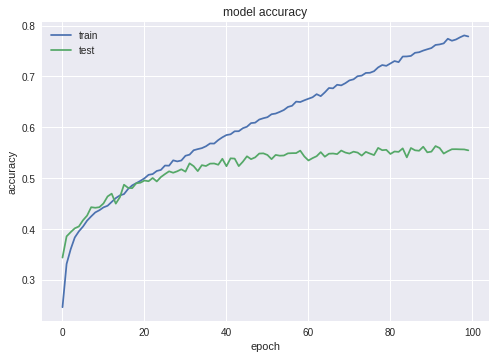

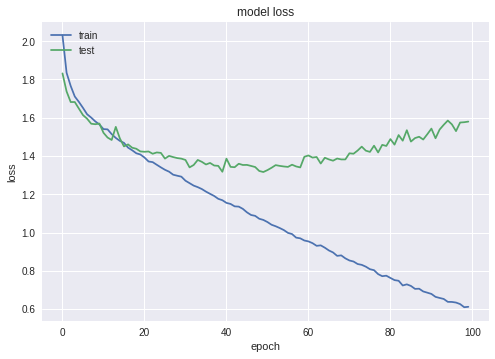

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()